# Lab Notebook 7 - SVM

Today we will be learning how to use a Support Vector Machine (SVM) algorithm! Please refer to Chapter 4 of the textbook for details on this ML method.

# SVM from sklearn

## Step 1

Import the modules you will need (numpy, pandas, etc). We are using the following test data set. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)

print("The first column of X1 are the horizontal coordinates, and the second column are the vertical coordinates.")
print("\nFirst 5 elements of X1:")
print(X1[:5])
print("\nFirst 5 elements of y1:")
print(y1[:5])

The first column of X1 are the horizontal coordinates, and the second column are the vertical coordinates.

First 5 elements of X1:
[[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]

First 5 elements of y1:
[ 1  1  1  1 -1]


Visualize it in a plot with appropriate labels.

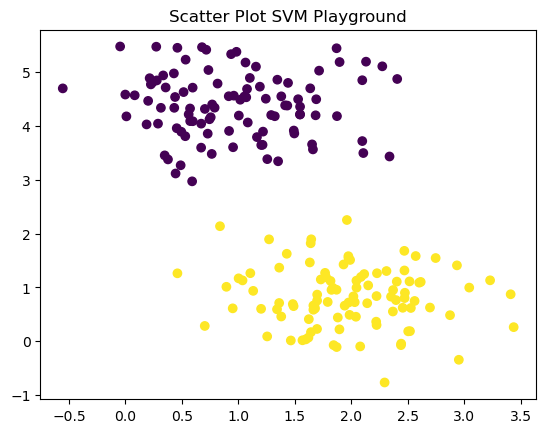

In [10]:
plt.title("Scatter Plot SVM Playground")
plt.scatter(X1[:,0],X1[:,1], c = y1)

## Step 2

Let's first use svm.SVC(kernel='linear') to define our SVM ML model. Fit the model to the data above using three different values of C: 0.01, 1, and 1e10. Print the w1 and w2 values, as well as the b (intercept) value for each C-value. Display the results in a plot showing the data above and the three decision boundary lines. 

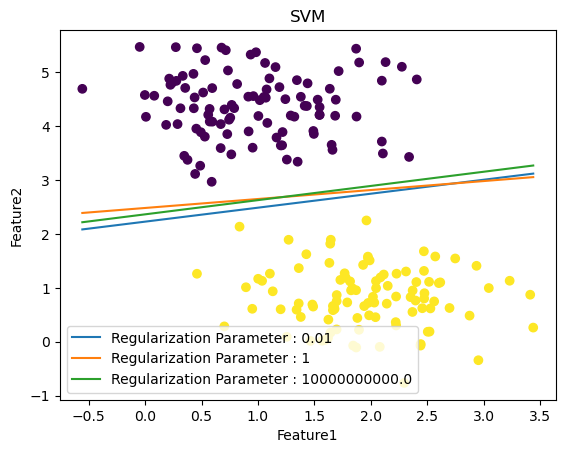

In [46]:


from sklearn.svm import SVC

coefficients = [0.01,1,1e10]
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("SVM")
# Create a range of x values
weights = []
x = np.linspace(min(X1[:,0]), max(X1[:,0]), 100)
for c in coefficients:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X1,y1)
    b = svc.intercept_[0]
    w = svc.coef_
    weights.append([w[0][0],w[0][1],b])
    y = -(w[0][0]/w[0][1])*x - b/w[0][1]
    plt.plot(x,y,label=f"Regularization Parameter : {c}")

plt.legend()


## Step 3

Check wether the sklearn solution for w1, w2, and b for the three C-values chosen above indeed satisfies the following inequality (eqn 4.5 from the textbook) for all data points: 

y^i(wx+b)>=1, where w = [w1 w2] and x = [x1 x2]

For those data points that violate the inequality, print them out or, if you have time, show them in the plot you made above with different colours. Also print out by how much these data points violate the conditon. Do the trends make sense to you?

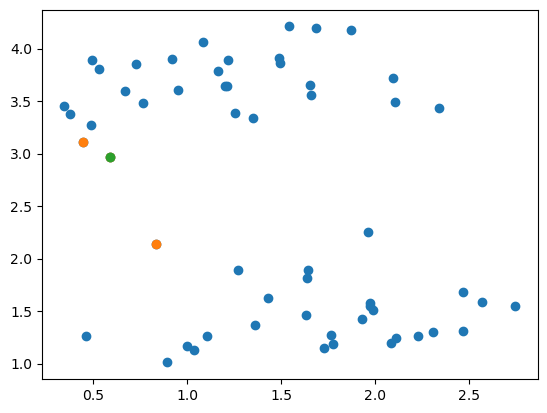

In [67]:
column_of_ones = np.ones((X1.shape[0], 1))
X1_new = np.hstack((X1, column_of_ones))

weights = np.array(weights)
violations = []
for w in weights:
    predictions = y1 * ( X1_new @ w )
    condition = predictions >= 1
    violations.append(X1[~condition])

for i  in range(3):
    x = violations[i]
    plt.scatter(x[:,0],x[:,1])
